In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft

In [2]:
from scipy import signal

(-2.0, 2.0)

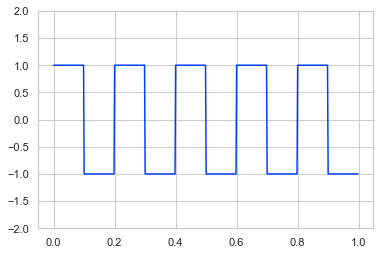

In [3]:
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)

In [4]:
signal_1 = pd.DataFrame(zip(t,signal.square(2 * np.pi * 5 * t)),columns=['Time','Value'])

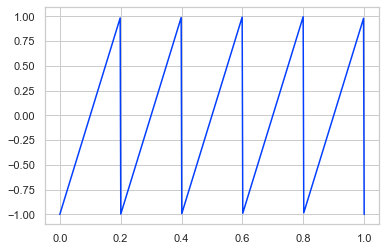

In [5]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500)
plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

In [6]:
signal_2 = pd.DataFrame(zip(t,signal.sawtooth(2 * np.pi * 5 * t)),columns=['Time','Value'])

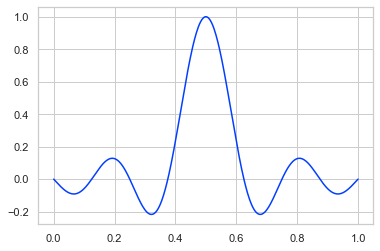

In [7]:
x = np.linspace(-4, 4, 500)
t = np.linspace(0, 1, 500)
y = np.sinc(x)
plt.plot(t,y)

In [8]:
signal_3 = pd.DataFrame(zip(t,y),columns=['Time','Value'])

In [9]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    freq_ampli_real = pd.DataFrame(zip(f[:N//2+1],yf[:N//2+1].real),columns=['Freq','Ampli'])
    freq_ampli_img = pd.DataFrame(zip(f[:N//2+1],yf[:N//2+1].imag),columns=['Freq','Ampli'])
    return freq_ampli_real,freq_ampli_img
freq_ampli1,freq_ampli1i = freq(signal_1)
freq_ampli2,freq_ampli2i = freq(signal_2)
freq_ampli3,freq_ampli3i = freq(signal_3)

## FFT
## Plot1 - Square/Rect Pulse
## Plot2 - Sawtooth
## Plot3 - Sinc

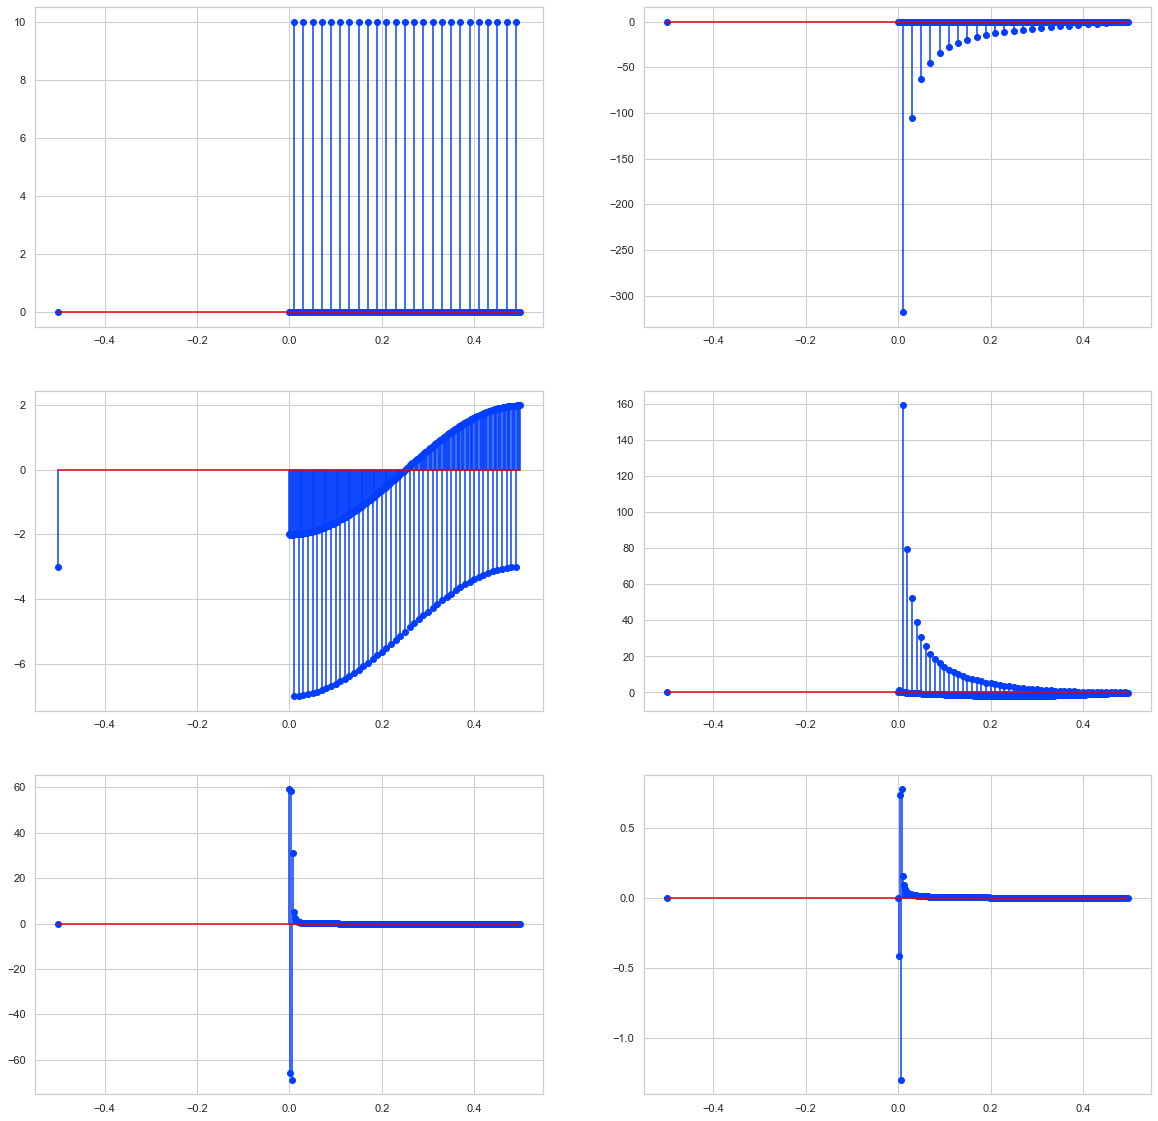

In [12]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
axs[0,0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
axs[1,0].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
axs[2,0].stem(freq_ampli3['Freq'], freq_ampli3['Ampli'])
axs[0,1].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
axs[1,1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])
axs[2,1].stem(freq_ampli3i['Freq'], freq_ampli3i['Ampli'])
plt.show()

In [11]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 7)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm

In [36]:
best_gmm0 = GMM_fit(freq_ampli1)
best_gmm1 = GMM_fit(freq_ampli2)
best_gmm2 = GMM_fit(freq_ampli3)
best_gmm0i = GMM_fit(freq_ampli1i)
best_gmm1i = GMM_fit(freq_ampli2i)
best_gmm2i = GMM_fit(freq_ampli3i)

In [37]:
best_gmm0

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [38]:
best_gmm0i

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [47]:
z1,_ = best_gmm0.sample(250)
z1i,_ = best_gmm0i.sample(250)

In [48]:
sample_1 = pd.DataFrame(zip(z1[:,0],z1[:,1]),columns=['Freq','Ampli'])
sample_1i = pd.DataFrame(zip(z1i[:,0],z1i[:,1]),columns=['Freq','Ampli'])

In [49]:
sample_1 = sample_1.sort_values(by=['Freq'],ascending=True)
sample_1 = sample_1[sample_1.Freq > 0]
sample_1

,Freq,Ampli
246,0.008649,-0.000143
53,0.011163,-0.001170
151,0.014906,0.000359
232,0.020924,-0.000689
10,0.039192,10.000939
...,...,...
186,0.586134,-0.000807
188,0.608568,0.000741
206,0.637057,0.000429
198,0.649220,0.001238


In [50]:
sample_1.head(20)

,Freq,Ampli
246,0.008649,-0.000143
53,0.011163,-0.001170
151,0.014906,0.000359
232,0.020924,-0.000689
10,0.039192,10.000939
200,0.042128,-0.000241
182,0.042330,-0.000008
26,0.044632,9.999907
61,0.056144,0.000712
41,0.060054,0.000142


In [51]:
sample_1i = sample_1i.sort_values(by=['Freq'],ascending=True)
sample_1i = sample_1i[sample_1i.Freq > 0]
sample_1i

,Freq,Ampli
62,0.004028,-0.001365
243,0.005588,-24.987842
230,0.011395,-318.205934
164,0.014887,-0.000116
26,0.018297,-0.001278
...,...,...
27,0.556133,-0.000785
38,0.576558,-0.000161
144,0.584853,0.000629
88,0.592379,0.000587


In [52]:
sample_1i.head(40)

,Freq,Ampli
62,0.004028,-0.001365
243,0.005588,-24.987842
230,0.011395,-318.205934
164,0.014887,-0.000116
26,0.018297,-0.001278
139,0.019556,-0.001615
188,0.020153,0.000258
126,0.022415,0.000940
98,0.028559,0.001420
226,0.047716,-0.001445


In [67]:
sample_1 = sample_1[(sample_1.Ampli>1) | (sample_1.Ampli<-1)]

In [68]:
sample_1i = sample_1i[(sample_1i.Ampli>1) | (sample_1i.Ampli<-1)]

In [69]:
f = fftpack.fftfreq(500)
f

array([ 0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,  0.012,  0.014,
        0.016,  0.018,  0.02 ,  0.022,  0.024,  0.026,  0.028,  0.03 ,
        0.032,  0.034,  0.036,  0.038,  0.04 ,  0.042,  0.044,  0.046,
        0.048,  0.05 ,  0.052,  0.054,  0.056,  0.058,  0.06 ,  0.062,
        0.064,  0.066,  0.068,  0.07 ,  0.072,  0.074,  0.076,  0.078,
        0.08 ,  0.082,  0.084,  0.086,  0.088,  0.09 ,  0.092,  0.094,
        0.096,  0.098,  0.1  ,  0.102,  0.104,  0.106,  0.108,  0.11 ,
        0.112,  0.114,  0.116,  0.118,  0.12 ,  0.122,  0.124,  0.126,
        0.128,  0.13 ,  0.132,  0.134,  0.136,  0.138,  0.14 ,  0.142,
        0.144,  0.146,  0.148,  0.15 ,  0.152,  0.154,  0.156,  0.158,
        0.16 ,  0.162,  0.164,  0.166,  0.168,  0.17 ,  0.172,  0.174,
        0.176,  0.178,  0.18 ,  0.182,  0.184,  0.186,  0.188,  0.19 ,
        0.192,  0.194,  0.196,  0.198,  0.2  ,  0.202,  0.204,  0.206,
        0.208,  0.21 ,  0.212,  0.214,  0.216,  0.218,  0.22 ,  0.222,
      

In [73]:
d = dict(zip(f,np.zeros(len(f))))
d

{0.0: 0.0,
 0.002: 0.0,
 0.004: 0.0,
 0.006: 0.0,
 0.008: 0.0,
 0.01: 0.0,
 0.012: 0.0,
 0.014: 0.0,
 0.016: 0.0,
 0.018000000000000002: 0.0,
 0.02: 0.0,
 0.022: 0.0,
 0.024: 0.0,
 0.026000000000000002: 0.0,
 0.028: 0.0,
 0.03: 0.0,
 0.032: 0.0,
 0.034: 0.0,
 0.036000000000000004: 0.0,
 0.038: 0.0,
 0.04: 0.0,
 0.042: 0.0,
 0.044: 0.0,
 0.046: 0.0,
 0.048: 0.0,
 0.05: 0.0,
 0.052000000000000005: 0.0,
 0.054: 0.0,
 0.056: 0.0,
 0.058: 0.0,
 0.06: 0.0,
 0.062: 0.0,
 0.064: 0.0,
 0.066: 0.0,
 0.068: 0.0,
 0.07: 0.0,
 0.07200000000000001: 0.0,
 0.074: 0.0,
 0.076: 0.0,
 0.078: 0.0,
 0.08: 0.0,
 0.082: 0.0,
 0.084: 0.0,
 0.08600000000000001: 0.0,
 0.088: 0.0,
 0.09: 0.0,
 0.092: 0.0,
 0.094: 0.0,
 0.096: 0.0,
 0.098: 0.0,
 0.1: 0.0,
 0.10200000000000001: 0.0,
 0.10400000000000001: 0.0,
 0.106: 0.0,
 0.108: 0.0,
 0.11: 0.0,
 0.112: 0.0,
 0.114: 0.0,
 0.116: 0.0,
 0.11800000000000001: 0.0,
 0.12: 0.0,
 0.122: 0.0,
 0.124: 0.0,
 0.126: 0.0,
 0.128: 0.0,
 0.13: 0.0,
 0.132: 0.0,
 0.134: 0.0,
 0

In [83]:
sd = dict(zip(np.round(f,3),np.zeros(len(f))))

In [70]:
sample_1.Freq = sample_1.Freq.apply(lambda x:round(x,3))
sample_1

,Freq,Ampli
10,0.039,10.000939
26,0.045,9.999907
5,0.076,10.001039
17,0.078,10.000323
14,0.082,10.001549
7,0.090,10.000038
15,0.095,9.999204
19,0.133,10.002002
20,0.142,10.000073
1,0.168,9.999292


In [71]:
sample_1i.Freq = sample_1i.Freq.apply(lambda x:round(x,3))
sample_1i

,Freq,Ampli
243,0.006,-24.987842
230,0.011,-318.205934
249,0.052,-63.137600
248,0.052,-63.137733
231,0.071,-45.306496
232,0.076,-43.070377
233,0.096,-34.089618
244,0.166,-19.212956
236,0.201,-17.639412
246,0.204,-15.291304


In [77]:
samp_1 = dict(zip(sample_1.Freq,sample_1.Ampli))
samp_1i = dict(zip(sample_1i.Freq,sample_1i.Ampli))

In [84]:
for i in samp_1.keys():
    if i in sd:
        sd[i] = samp_1[i]
        sd[-i] = samp_1[i]
    elif i+0.001 in sd:
        sd[i+0.001] = samp_1[i]
        sd[-(i+0.001)] = samp_1[i]
    elif i-0.001 in sd:
        sd[i-0.001] = samp_1[i]
        sd[-(i-0.001)] = samp_1[i]
sd

{0.0: 0.0,
 0.002: 0.0,
 0.004: 0.0,
 0.006: 0.0,
 0.008: 0.0,
 0.01: 0.0,
 0.012: 0.0,
 0.014: 0.0,
 0.016: 0.0,
 0.018: 0.0,
 0.02: 0.0,
 0.022: 0.0,
 0.024: 0.0,
 0.026: 0.0,
 0.028: 0.0,
 0.03: 0.0,
 0.032: 0.0,
 0.034: 0.0,
 0.036: 0.0,
 0.038: 0.0,
 0.04: 10.000939480202037,
 0.042: 0.0,
 0.044: 0.0,
 0.046: 9.999906760042867,
 0.048: 0.0,
 0.05: 0.0,
 0.052: 0.0,
 0.054: 0.0,
 0.056: 0.0,
 0.058: 0.0,
 0.06: 0.0,
 0.062: 0.0,
 0.064: 0.0,
 0.066: 0.0,
 0.068: 0.0,
 0.07: 0.0,
 0.072: 0.0,
 0.074: 0.0,
 0.076: 10.001038628437511,
 0.078: 10.00032334619127,
 0.08: 0.0,
 0.082: 10.001548562118046,
 0.084: 0.0,
 0.086: 0.0,
 0.088: 0.0,
 0.09: 10.000038304262914,
 0.092: 0.0,
 0.094: 0.0,
 0.096: 9.99920449413452,
 0.098: 0.0,
 0.1: 0.0,
 0.102: 0.0,
 0.104: 0.0,
 0.106: 0.0,
 0.108: 0.0,
 0.11: 0.0,
 0.112: 0.0,
 0.114: 0.0,
 0.116: 0.0,
 0.118: 0.0,
 0.12: 0.0,
 0.122: 0.0,
 0.124: 0.0,
 0.126: 0.0,
 0.128: 0.0,
 0.13: 0.0,
 0.132: 0.0,
 0.134: 10.002002254557958,
 0.136: 0.0,
 0.

In [85]:
for i in samp_1i.keys():
    if i in sd:
        sd[i] = complex(sd[i],samp_1i[i])
        sd[-i] = complex(sd[i],-(samp_1i[i]))
    elif i+0.001 in sd:
        sd[i+0.001] = complex(sd[i+0.001],samp_1i[i])
        sd[-(i+0.001)] = complex(sd[i+0.001],-(samp_1i[i]))
    elif i-0.001 in sd:
        sd[i-0.001] = complex(sd[i-0.001],samp_1i[i])
        sd[-(i-0.001)] = complex(sd[i-0.001],-(samp_1i[i]))
sd

{0.0: 0.0,
 0.002: 0.0,
 0.004: 0.0,
 0.006: -24.98784191678894j,
 0.008: 0.0,
 0.01: 0.0,
 0.012: -318.2059338229792j,
 0.014: 0.0,
 0.016: 0.0,
 0.018: 0.0,
 0.02: 0.0,
 0.022: 0.0,
 0.024: 0.0,
 0.026: 0.0,
 0.028: 0.0,
 0.03: 0.0,
 0.032: 0.0,
 0.034: 0.0,
 0.036: 0.0,
 0.038: 0.0,
 0.04: 10.000939480202037,
 0.042: 0.0,
 0.044: 0.0,
 0.046: 9.999906760042867,
 0.048: 0.0,
 0.05: 0.0,
 0.052: -63.13773330366242j,
 0.054: 0.0,
 0.056: 0.0,
 0.058: 0.0,
 0.06: 0.0,
 0.062: 0.0,
 0.064: 0.0,
 0.066: 0.0,
 0.068: 0.0,
 0.07: 0.0,
 0.072: -45.30649617215076j,
 0.074: 0.0,
 0.076: (10.001038628437511-43.07037726670273j),
 0.078: 10.00032334619127,
 0.08: 0.0,
 0.082: 10.001548562118046,
 0.084: 0.0,
 0.086: 0.0,
 0.088: 0.0,
 0.09: 10.000038304262914,
 0.092: 0.0,
 0.094: 0.0,
 0.096: (9.99920449413452-34.08961750674566j),
 0.098: 0.0,
 0.1: 0.0,
 0.102: 0.0,
 0.104: 0.0,
 0.106: 0.0,
 0.108: 0.0,
 0.11: 0.0,
 0.112: 0.0,
 0.114: 0.0,
 0.116: 0.0,
 0.118: 0.0,
 0.12: 0.0,
 0.122: 0.0,
 0

In [86]:
value = list(sd.values())

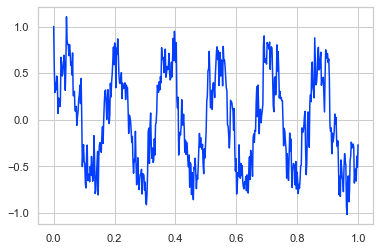

In [88]:
ift = fft.ifft(value)
plt.plot(t,ift)